In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import sleep

In [2]:
from nba_api.stats.endpoints.leagueleaders import LeagueLeaders

In [15]:
from adjustText import adjust_text

In [3]:
league_leaders = LeagueLeaders(season="All Time", stat_category_abbreviation="AST")

In [4]:
leaders_df = league_leaders.get_data_frames()[0]

In [12]:
stockton_id = 304

In [13]:
non_stockton = leaders_df.loc[leaders_df.PLAYER_ID != stockton_id]
stockton_df = leaders_df.loc[leaders_df.PLAYER_ID == stockton_id]

In [14]:
top_players = leaders_df.iloc[:10]

In [19]:
sort_stl = leaders_df.sort_values(by='STL', ascending=False).iloc[:7]

In [20]:
all_data = pd.concat([top_players, sort_stl])

In [17]:
plt.style.use('fivethirtyeight')

In [53]:
bball_gray = '#312f30'
bball_white = '#dddee0'
bball_orange = '#f87c24'
bball_light_orange = '#fbaf7b'

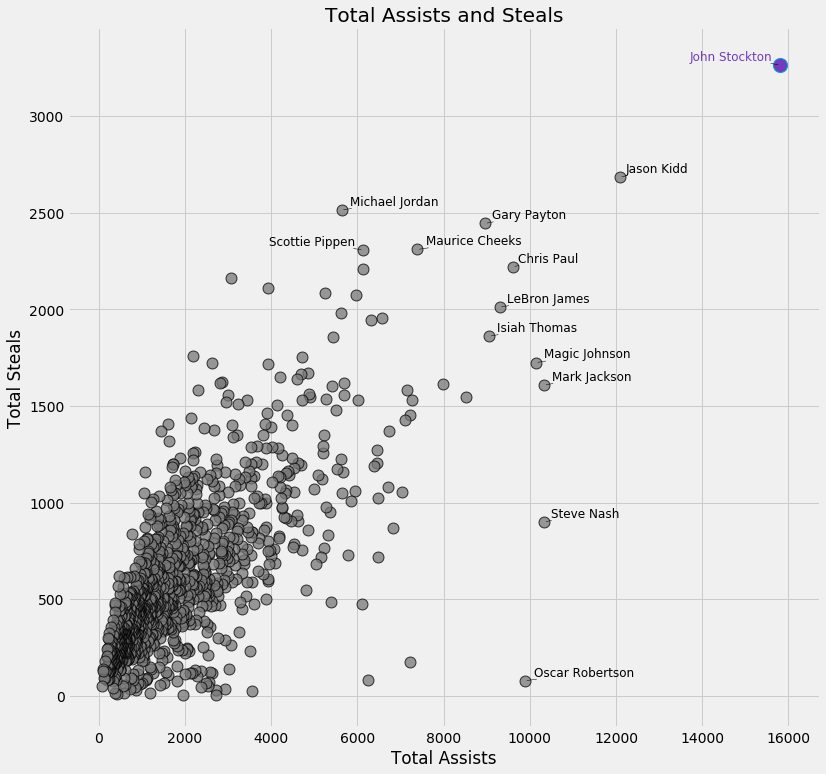

In [63]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.scatter(x=non_stockton.AST, y=non_stockton.STL, s=120, color='#787878', edgecolors='black', lw=1, alpha=0.75)
ax.scatter(x=stockton_df.AST, y=stockton_df.STL, s=200, color='#753BBD', edgecolors='#00A9E0', lw=1)
ax.set_xlabel("Total Assists")
ax.set_ylabel("Total Steals")

ax.set_title("Total Assists and Steals")


texts = []
added = []
for index in range(len(all_data)):
    item = all_data.iloc[index]
    if item.PLAYER_NAME in added:
        continue
    if item.PLAYER_ID == stockton_id:
        texts.append(ax.text(x=item.AST, y=item.STL, s=item.PLAYER_NAME, size=12, color='#753BBD'))
    else:
        texts.append(ax.text(x=item.AST, y=item.STL, s=item.PLAYER_NAME, size=12, color='black'))
    added.append(item.PLAYER_NAME)
    
_ = adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'), expand_points=(1.2, 1.3))

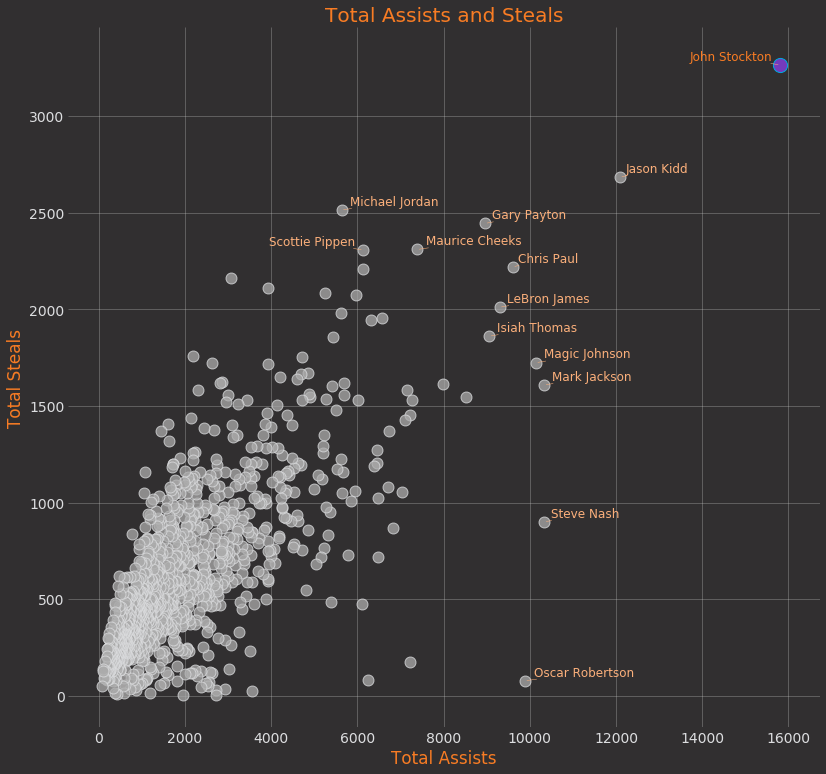

In [64]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.scatter(x=non_stockton.AST, y=non_stockton.STL, s=120, color='#ABABAB', edgecolors=bball_white, lw=1, alpha=0.75)
ax.scatter(x=stockton_df.AST, y=stockton_df.STL, s=200, color='#753BBD', edgecolors='#00A9E0', lw=1)
ax.set_xlabel("Total Assists", color=bball_orange)
ax.set_ylabel("Total Steals", color=bball_orange)

ax.set_title("Total Assists and Steals", color=bball_orange)
ax.set_facecolor(bball_gray)
fig.set_facecolor(bball_gray)
ax.set_frame_on(False)
ax.grid(b=True, alpha=0.3)
ticks = ax.get_xticklabels()
for tick in ticks:
    tick.set_color(bball_white)
ticks = ax.get_yticklabels()
for tick in ticks:
    tick.set_color(bball_white)

texts = []
added = []
for index in range(len(all_data)):
    item = all_data.iloc[index]
    if item.PLAYER_NAME in added:
        continue
    if item.PLAYER_ID == stockton_id:
        texts.append(ax.text(x=item.AST, y=item.STL, s=item.PLAYER_NAME, size=12, color=bball_orange))
    else:
        texts.append(ax.text(x=item.AST, y=item.STL, s=item.PLAYER_NAME, size=12, color=bball_light_orange))
    added.append(item.PLAYER_NAME)
    
_ = adjust_text(texts, arrowprops=dict(arrowstyle='-', color=bball_light_orange), expand_points=(1.2, 1.3))

In [38]:
top_passers = top_players.iloc[:8]

In [26]:
from nba_api.stats.endpoints.playercareerstats import PlayerCareerStats

In [108]:
player_stats = {}

In [109]:
for index in range(len(top_passers)):
    item = top_passers.iloc[index]
    career = PlayerCareerStats(player_id=item.PLAYER_ID)
    player_df = career.get_data_frames()[0]
    player_stats[item.PLAYER_ID] = player_df
    sleep(0.25)

In [119]:
player_colors = [
    "#753BBD",
    "#C6CFD4",
    "#E56020",
    "#006BB6",
    "#FDB927",
    "#009429",
    "#C8102E",
    "#860038"
]

Text(0.5, 1.0, 'Best Assisters through time')

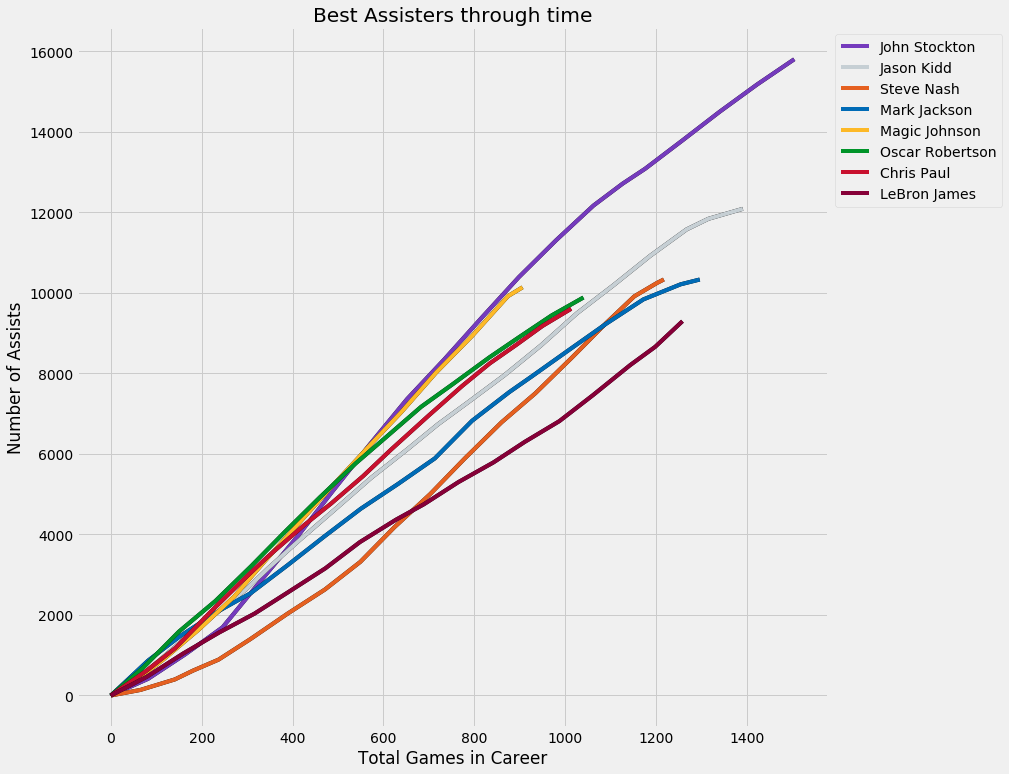

In [122]:
fig, ax = plt.subplots(figsize=(12, 12))

for cur_index, player_id in enumerate(player_stats):
    games_total = [0]
    assists_total = [0]
    player_df = player_stats[player_id]
    game_total = 0
    ast_total = 0
    season_list = list(player_df.SEASON_ID.unique())
    for index in range(len(season_list)):
        season_data = player_df.loc[player_df.SEASON_ID == season_list[index]]
        if len(season_data) > 1:
            final_data = season_data.loc[season_data.TEAM_ABBREVIATION == "TOT"].iloc[0]
        else:
            final_data = season_data.iloc[0]
        seasons.append(index+1)
        ast_total += final_data.AST
        game_total += final_data.GP
        games_total.append(game_total)
        assists_total.append(ast_total)
    
    ax.plot(games_total, assists_total, color='black', lw=4)
    ax.plot(games_total, assists_total, label=top_players.loc[top_players.PLAYER_ID == player_id].iloc[0].PLAYER_NAME, color=player_colors[cur_index])

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_xlabel("Total Games in Career")
ax.set_ylabel("Number of Assists")
ax.set_title("Best Assisters through time")

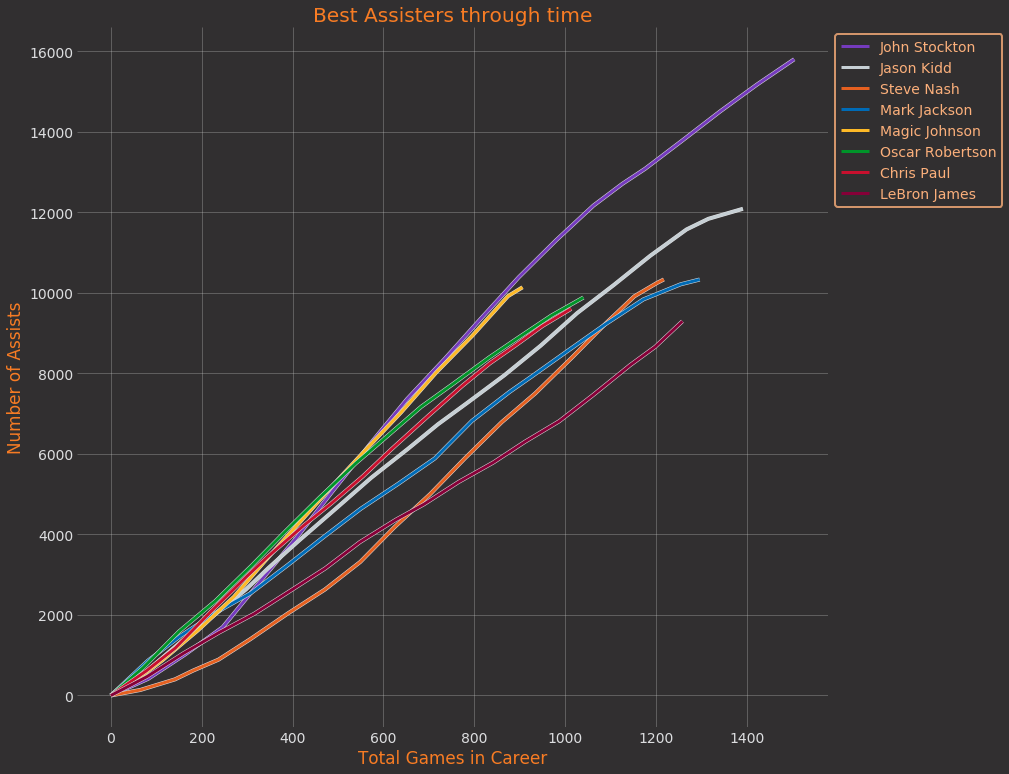

In [121]:
fig, ax = plt.subplots(figsize=(12, 12))

for cur_index, player_id in enumerate(player_stats):
    games_total = [0]
    assists_total = [0]
    player_df = player_stats[player_id]
    game_total = 0
    ast_total = 0
    season_list = list(player_df.SEASON_ID.unique())
    for index in range(len(season_list)):
        season_data = player_df.loc[player_df.SEASON_ID == season_list[index]]
        if len(season_data) > 1:
            final_data = season_data.loc[season_data.TEAM_ABBREVIATION == "TOT"].iloc[0]
        else:
            final_data = season_data.iloc[0]
        seasons.append(index+1)
        ast_total += final_data.AST
        game_total += final_data.GP
        games_total.append(game_total)
        assists_total.append(ast_total)
    
    ax.plot(games_total, assists_total, color=bball_white, lw=4)
    ax.plot(games_total, assists_total, label=top_players.loc[top_players.PLAYER_ID == player_id].iloc[0].PLAYER_NAME, color=player_colors[cur_index], lw=3)

ax.set_facecolor(bball_gray)
fig.set_facecolor(bball_gray)
ax.set_frame_on(False)
ax.grid(b=True, alpha=0.3)
ticks = ax.get_xticklabels()
for tick in ticks:
    tick.set_color(bball_white)
ticks = ax.get_yticklabels()
for tick in ticks:
    tick.set_color(bball_white)

ax.set_xlabel("Total Games in Career", color=bball_orange)
ax.set_ylabel("Number of Assists", color=bball_orange)
ax.set_title("Best Assisters through time", color=bball_orange)

legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
frame = legend.get_frame()
frame.set_facecolor(bball_gray)
frame.set_linewidth(2)
frame.set_edgecolor(bball_light_orange)
for text in legend.get_texts():
    text.set_color(bball_light_orange)



## Steals

In [113]:
top_stealers = leaders_df.sort_values(by='STL', ascending=False).iloc[:5]

In [114]:
top_stealers.loc[:, ["PLAYER_ID", "PLAYER_NAME", "GP", "STL"]]

,PLAYER_ID,PLAYER_NAME,GP,STL
0,304,John Stockton,1504,3265.0
1,467,Jason Kidd,1391,2684.0
44,893,Michael Jordan,1072,2514.0
9,56,Gary Payton,1335,2445.0
12,76385,Maurice Cheeks,1101,2310.0


In [115]:
player_colors = [
    "#753BBD",
    "#C6CFD4",
    "#CE1141",
    "#00653A",
    "#006BB6",
]

In [116]:
stealer_stats = {}

for index in range(len(top_stealers)):
    item = top_stealers.iloc[index]
    career = PlayerCareerStats(player_id=item.PLAYER_ID)
    player_df = career.get_data_frames()[0]
    stealer_stats[item.PLAYER_ID] = player_df
    sleep(0.25)

Text(0.5, 1.0, 'Best Stealers through time')

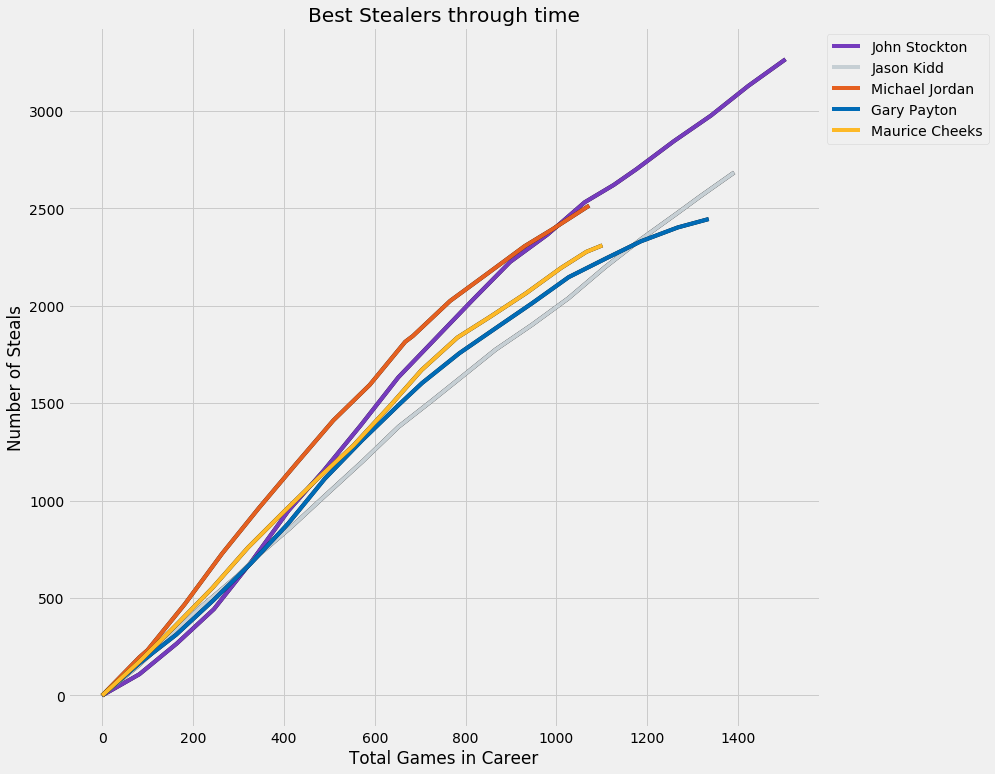

In [123]:
fig, ax = plt.subplots(figsize=(12, 12))

for cur_index, player_id in enumerate(stealer_stats):
    games_total = [0]
    assists_total = [0]
    player_df = stealer_stats[player_id]
    game_total = 0
    ast_total = 0
    season_list = list(player_df.SEASON_ID.unique())
    for index in range(len(season_list)):
        season_data = player_df.loc[player_df.SEASON_ID == season_list[index]]
        if len(season_data) > 1:
            final_data = season_data.loc[season_data.TEAM_ABBREVIATION == "TOT"].iloc[0]
        else:
            final_data = season_data.iloc[0]
        seasons.append(index+1)
        ast_total += final_data.STL
        game_total += final_data.GP
        games_total.append(game_total)
        assists_total.append(ast_total)
    
    ax.plot(games_total, assists_total, color='black', lw=4)
    ax.plot(games_total, assists_total, label=top_stealers.loc[top_stealers.PLAYER_ID == player_id].iloc[0].PLAYER_NAME, color=player_colors[cur_index])

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_xlabel("Total Games in Career")
ax.set_ylabel("Number of Steals")
ax.set_title("Best Stealers through time")

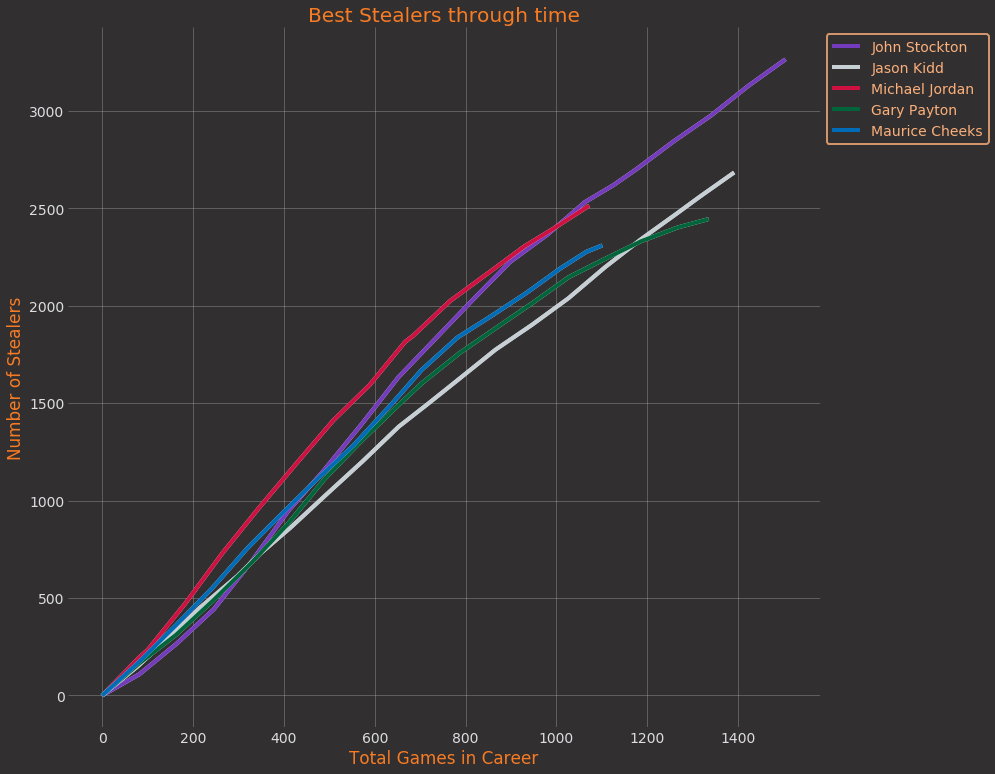

In [118]:
fig, ax = plt.subplots(figsize=(12, 12))

for cur_index, player_id in enumerate(stealer_stats):
    games_total = [0]
    assists_total = [0]
    player_df = stealer_stats[player_id]
    game_total = 0
    ast_total = 0
    season_list = list(player_df.SEASON_ID.unique())
    for index in range(len(season_list)):
        season_data = player_df.loc[player_df.SEASON_ID == season_list[index]]
        if len(season_data) > 1:
            final_data = season_data.loc[season_data.TEAM_ABBREVIATION == "TOT"].iloc[0]
        else:
            final_data = season_data.iloc[0]
        seasons.append(index+1)
        ast_total += final_data.STL
        game_total += final_data.GP
        games_total.append(game_total)
        assists_total.append(ast_total)
    
    ax.plot(games_total, assists_total, color=bball_white, lw=4)
    ax.plot(games_total, assists_total, label=top_stealers.loc[top_stealers.PLAYER_ID == player_id].iloc[0].PLAYER_NAME, color=player_colors[cur_index])

ax.set_facecolor(bball_gray)
fig.set_facecolor(bball_gray)
ax.set_frame_on(False)
ax.grid(b=True, alpha=0.3)
ticks = ax.get_xticklabels()
for tick in ticks:
    tick.set_color(bball_white)
ticks = ax.get_yticklabels()
for tick in ticks:
    tick.set_color(bball_white)
    
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_xlabel("Total Games in Career", color=bball_orange)
ax.set_ylabel("Number of Stealers", color=bball_orange)
ax.set_title("Best Stealers through time", color=bball_orange)


legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
frame = legend.get_frame()
frame.set_facecolor(bball_gray)
frame.set_linewidth(2)
frame.set_edgecolor(bball_light_orange)
for text in legend.get_texts():
    text.set_color(bball_light_orange)